![RippleLabs](http://www.rre.com/system/companies/187-logo-Ripple-340x163.png "Ripple")

[Gilles Pirio](mailto:gilles.xrp@gmail.com) @ Ripple Labs Research & Data Team.

# Visualizing order books on Ripple

[Ripple](https://ripple.com/) is a distributed ledger that is not limited to one currency. The Ripple protocol allows users or entities to define their store of value (and define what that value is as it is not only limited to fiat currencies). A native trading engine is implemented in [rippled](https://github.com/ripple/rippled), the Ripple daemon). The Ripple protocol also defines a native currency designed to improve market liquidity: XRP. The Ripple peer-to-peer network therefore include all the building blocks necessary for a market to function: users, gateways, market makers, financial institutions, ...

XRP has a central place in the protocol: beyond bringing security and reducing spam, it is also designed to increase the overall liquidity. XRP often acts as a bridge between the different currencies - if trading between two currencies is not possible because no (or limited) offers is available, the Ripple protocol will often be able to find a path when both currencies can be traded to/from XRP.

We introduce a tool used to visualize orderbooks and explore how XRP is indeed increasing liquidity between currencies.

## Getting and vizualizing order books

We start by importing useful modules from [matplotlib](http://matplotlib.org/) (a plotting package) and [pyripple](https://github.com/gip/pyripple). We then create a feed object to get data from Ripple. 

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
from pyripple.feed import syncfeed
feed = syncfeed.SyncFeed()

Given two currency pairs, the `getOrderbook()` function will return the orderbook, either locally if cached, or by connecting to a data provider. [Bitstamp](https://www.bitstamp.net/) is a major gateway on Ripple, and we will pull the USD@Bitstamp / XRP orderbook. The issuer account for Bitstamp can be found [here](https://www.bitstamp.net/ripple.txt). The `showInfo()` function shows basic information about the orderbook.

In [39]:
# Bitstamp issuer address
Bitstamp = 'rvYAfWj5gh67oV6fW32ZzP3Aw4Eubs59B'
# Getting USD@Bitstamp / XRP order book
USDXRP_Bitstamp = feed.getOrderbook(('USD', Bitstamp), ('XRP', None))
# Show some information
USDXRP_Bitstamp.showInfo()

Orderbook USDXRP in ledger 15380994
  Close date: None
  Currency: USD@rvYAfWj5gh67oV6fW32ZzP3Aw4Eubs59B
  Counter currency: XRP
  Spread: 0.074365 (0.058606 %)
  Best ask/bid: 126.888406 / 126.814041
  Through:  []


We use the `plot()` function to vizualize our order book.

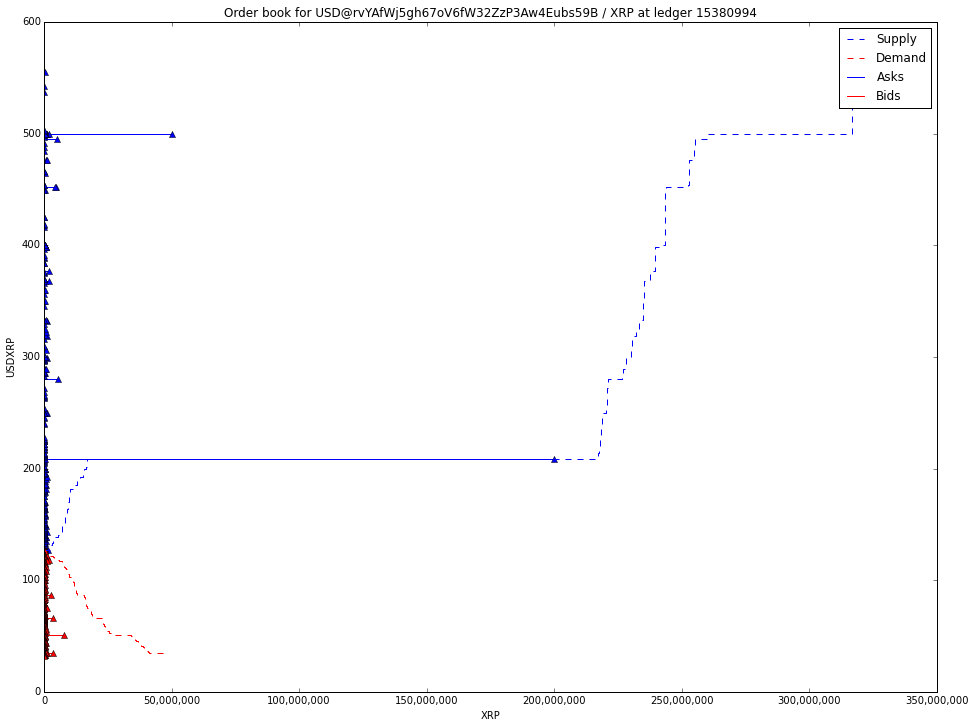

In [40]:
USDXRP_Bitstamp.plot()

It is also possible to add a weighted average plot. The weighted average (straight lines) represents the global exchange rate as a function of the amount of currency exchanged. 

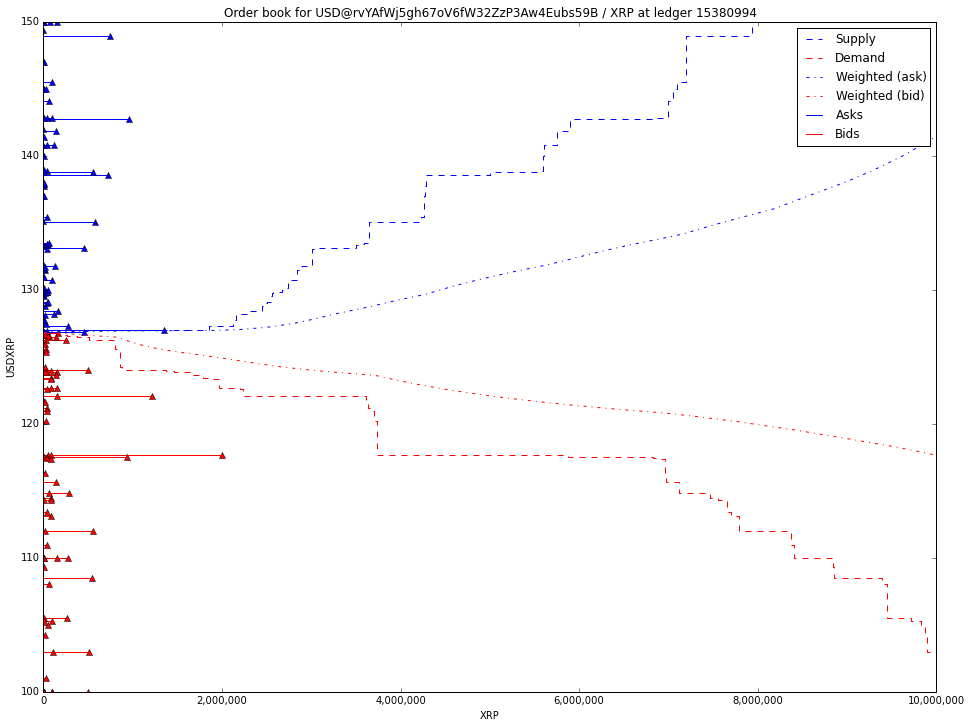

In [41]:
# Normal orderbook plot
USDXRP_Bitstamp.plot()
# Add a weighted plot (newfig is set to False so we don't create a new plot)
USDXRP_Bitstamp.plotWeighted(10e6, newfig= False, styleask= 'b-.', stylebid='r-.', label='Weighted')
# Set y and x limit as well as the legend
plt.gca().set_ylim((100, 150))
plt.gca().set_xlim((0, 10e6))
plt.legend()

As expected, the bigger the amount exchanged, the worst the actual exchange rate. Functions exist to compute weighted average. For instance:

In [42]:
for i in [1,2,3,4,5,6,7]:
  print('The gloabal echange rate to buy %8i XRP could be %f' % (10**i, USDXRP_Bitstamp.weigtedAverageA(10**i)))
for i in [1,2,3,4,5,6,7]:
  print('The global echange rate to sell %8i XRP could be %f' % (10**i, USDXRP_Bitstamp.weigtedAverageB(10**i)))

The gloabal echange rate to buy       10 XRP could be 126.888406
The gloabal echange rate to buy      100 XRP could be 126.888406
The gloabal echange rate to buy     1000 XRP could be 126.888717
The gloabal echange rate to buy    10000 XRP could be 126.893595
The gloabal echange rate to buy   100000 XRP could be 126.894293
The gloabal echange rate to buy  1000000 XRP could be 126.950319
The gloabal echange rate to buy 10000000 XRP could be 141.458890
The global echange rate to sell       10 XRP could be 126.814041
The global echange rate to sell      100 XRP could be 126.814041
The global echange rate to sell     1000 XRP could be 126.814041
The global echange rate to sell    10000 XRP could be 126.814041
The global echange rate to sell   100000 XRP could be 126.814041
The global echange rate to sell  1000000 XRP could be 126.080724
The global echange rate to sell 10000000 XRP could be 117.663124


Note that there is simply no guarantees this exchange rates could be achieved if a real transaction were to be sent. That is because other players on the market could also place competing buy/sell orders and alter the actual exchange rates significantly.

## The role of XRP

We are now going to vizualise the USD to USD direct conversion rate between two gateways on the Ripple network, [Bitstamp](https://www.bitstamp.net/) and [Gatehub](https://gatehub.net). 

In [43]:
# Gatehub issuer address
Gatehub = 'rhub8VRN55s94qWKDv6jmDy1pUykJzF3wq'
# Getting USD@Bitstamp to USD@Gatehub orderbook
USD_Bitstamp_Gatehub = feed.getOrderbook(('USD', Bitstamp), ('USD', Gatehub)) # Getting the order book
# Showing some info
USD_Bitstamp_Gatehub.showInfo()

Orderbook USDUSD in ledger 15381016
  Close date: None
  Currency: USD@rvYAfWj5gh67oV6fW32ZzP3Aw4Eubs59B
  Counter currency: USD@rhub8VRN55s94qWKDv6jmDy1pUykJzF3wq
  Spread: 0.007477 (0.740703 %)
  Best ask/bid: 1.009486 / 1.002009
  Through:  []


We then get the USD@Bitstamp to XRP orderbook and then the XRP to USD@Snapswap one.

In [44]:
# Getting USD@Bitstamp to XRP orderbook
USDXRP_Bitstamp = feed.getOrderbook(('USD', Bitstamp), ('XRP', None))
# Getting XRP to USD@Gatehub
XRPUSD_Gatehub = feed.getOrderbook(('XRP', None), ('USD', Gatehub))

We can do the product of the two previous orderbook. The result will be a synthetic order book that simulates a trade going through the USD@Bitstamp / XRP and XRP / USD@Gatehub order books.

In [45]:
# The product of two order book produces a synthetic order book simulating a trade going through both initial books
USD_Bitstamp_Gatehub_Through_XRP = USDXRP_Bitstamp * XRPUSD_Gatehub
# Showing some info
USD_Bitstamp_Gatehub_Through_XRP.showInfo()

Orderbook USDUSD in ledger 15381028
  Close date: None
  Currency: USD@rvYAfWj5gh67oV6fW32ZzP3Aw4Eubs59B
  Counter currency: USD@rhub8VRN55s94qWKDv6jmDy1pUykJzF3wq
  Spread: 0.003110 (0.311187 %)
  Best ask/bid: 0.999528 / 0.996417
  Through:  [('XRP', None)]


Both `USD_Bitstamp_Gatehub_Through_XRP` and `USD_Bitstamp_Gatehub` have the same currency pairs. Only difference is that the former describe a trade going through XRP as an intermediary currency. We now plot the weighted average for both orderbooks: the 

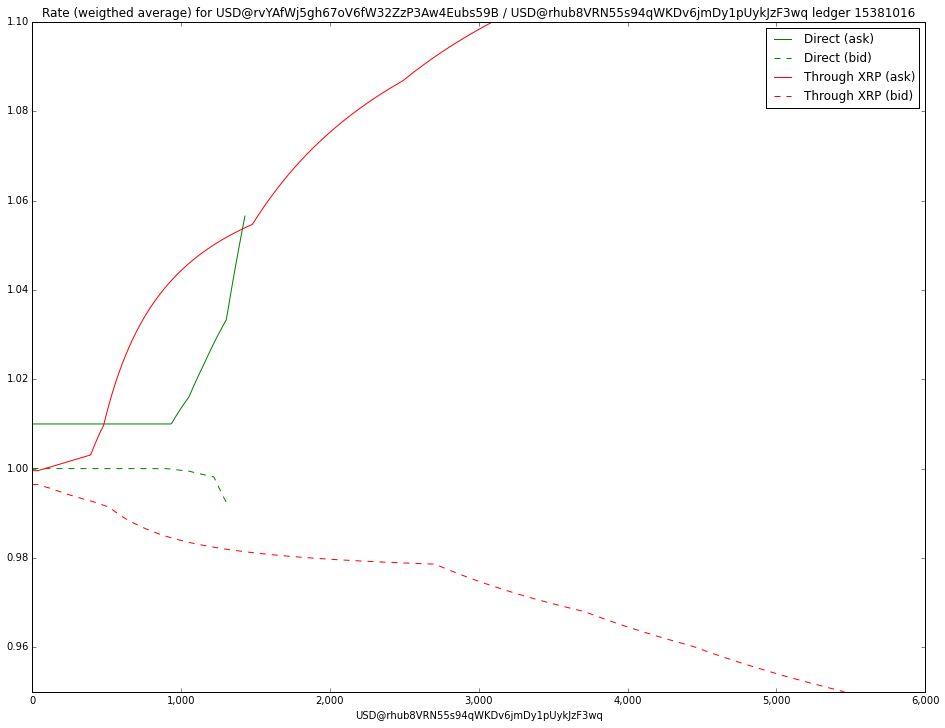

In [46]:
# Direct orderbook in green
USD_Bitstamp_Gatehub.plotWeighted(6000, styleask='g', stylebid='g--', label='Direct')
# Through XRP in red
USD_Bitstamp_Gatehub_Through_XRP.plotWeighted(6000, stylebid='r--', styleask='r', newfig= False, label='Through XRP')
# Setting limits
plt.gca().set_ylim((0.95, 1.1))
plt.legend()

First, it is noticeable that the exchange rate for USD issued by Gatehub and Bitstamp may not be exactly 1.0. One of the reason may be may be related to the amount of trust the market places in these two gateways.

Second, directly trading USD@Bitstamp to USD@Gatehub has some limitation:
* The orderbook is limited in size - meaning that direclty selling/buying Gatehub USD for Bitstamp USD won't be possible for amount in excess of ~USD 1500.
* The rate offered by the direct orderbook is not always competitive. In some cases, going through XRP gives a better trade in terms of available size (payment in excess of USD 10k can easily be processed) and rate.

**The good news is that on the Ripple network, exchanges will usually use the cheapest rate available**. More specifically, a trade on Ripple will use the best price out of the direct path or a path going through XRP as an intermediery currency. Alternatively, it is also possible to specify a custom path, though that would require a custom pathfinding engine.

## Comparing orderbook

We are now going to vizualise the USDXRP books for 3 USD gateway on the Ripple consensus ledger: [Bitstamp](https://www.bitstamp.net/), [Snapswap](https://snapswap.us) and [Gatehub](https://gatehub.net). The spread as a function of the exchange size may be a key factor when picking a gateway. 

In [48]:
# Issuer address for Snapswap
Snapswap = 'rMwjYedjc7qqtKYVLiAccJSmCwih4LnE2q'
# Pull the 3 order books
USDXRP_Bitstamp = feed.getOrderbook(('USD', Bitstamp), ('XRP', None))
USDXRP_Snapswap = feed.getOrderbook(('USD', Snapswap), ('XRP', None))
USDXRP_Gatehub = feed.getOrderbook(('USD', Gatehub), ('XRP', None))

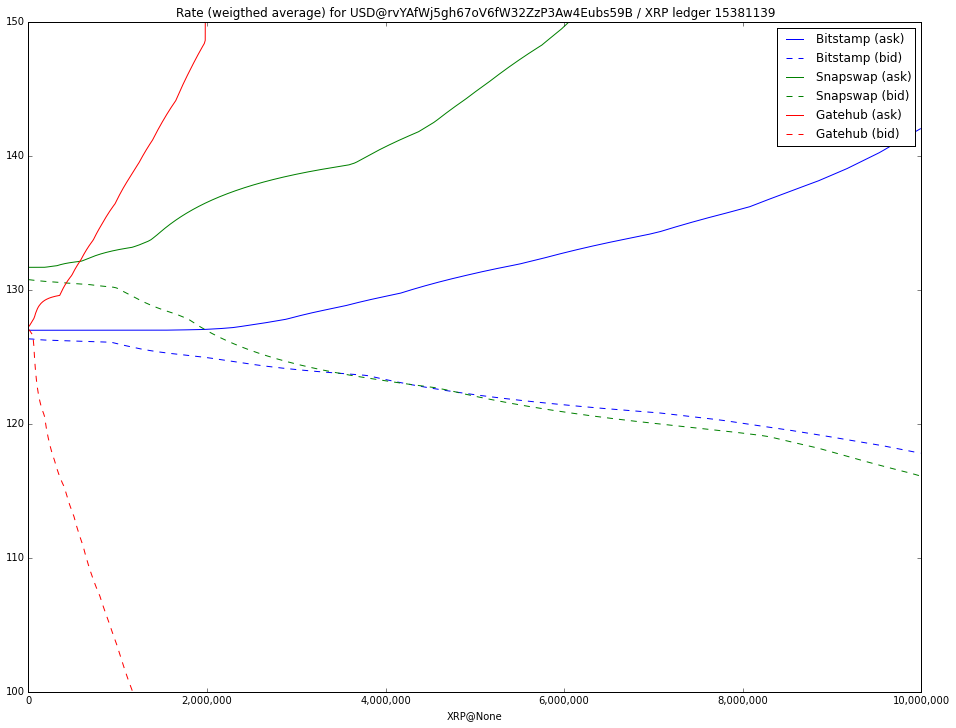

In [49]:
# Plotting the order books on the same graph
USDXRP_Bitstamp.plotWeighted(10e6, newfig= True, styleask='b', stylebid='b--', label='Bitstamp')
USDXRP_Snapswap.plotWeighted(10e6, newfig= False, styleask='g', stylebid='g--', label='Snapswap')
USDXRP_Gatehub.plotWeighted(10e6, newfig= False, styleask='r', stylebid='r--', label='Gatehub')
plt.gca().set_ylim((100,150))
plt.legend()

The plot above clearly shows huge variations in terms of:
* Best rate available
* Initial bid/ask spread
* Evolution of the spread and the rate as size of the exchange grows

These parameters are key metrics when considering which gateway to do business with and extend trust to.

## Conclusion

We introduced a visualization package for order books. It can be used to explore how trading between arbitrary currency pairs works on Ripple.
